In [1]:
from shared import *
from utils.cores import get_core_supply_df
core_supply_df = get_core_supply_df()
CORE_FRAMEWORK_RARITY_RATIOS = { 'common': 0.4721, 'uncommon': 0.2784, 'rare': 0.1583, 'legendary': 0.0675, 'mythical': 0.0224, 'godlike': 0.0013 }
CORE_FRAMEWORK_SLOT_RATIOS = { 'Hands': 0.3, 'Head': 0.2250, 'Body': 0.2250, 'Eyes': 0.1, 'Face': 0.1, 'Pet': 0.05 }

## Wearable Cores Supply

### Core Supply by Rarity

In [2]:
supply_by_rarity_df = core_supply_df.groupby('Rarity').agg({'Supply': 'sum'}).reset_index().sort_values('Supply')
supply_by_rarity_df['Proportion of Supply'] = supply_by_rarity_df.apply(lambda row: row['Supply'] / supply_by_rarity_df['Supply'].sum() * 100, axis=1)
supply_by_rarity_df['Core Framework'] = supply_by_rarity_df.apply(lambda row: CORE_FRAMEWORK_RARITY_RATIOS[row['Rarity']] * 100, axis=1)
show_itable(supply_by_rarity_df.set_index('Rarity'), order=[[1, 'desc']], column_formats={'Proportion of Supply': '{:,.3f} %', 'Core Framework': '{:,.3f} %'}) 

### Core Supply by Slot & Rarity

In [3]:
show_itable_long(core_supply_df[['Rarity', 'Slot', 'Supply']], order=[[2, 'desc']])

### Slot Proportion of Rarity

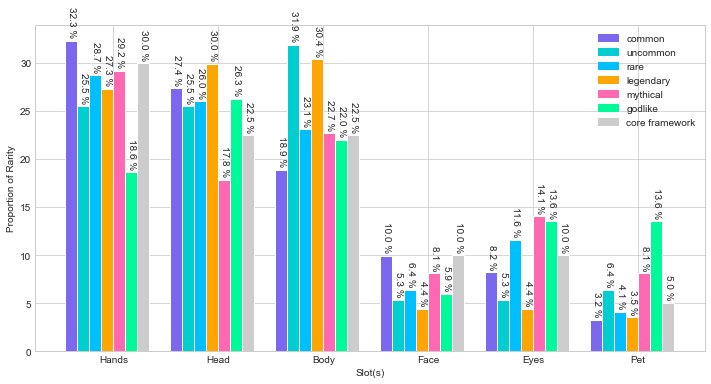

In [4]:
%%capture --no-display
# hide the warning about bar color and edge color

supply_by_slot_rarity_df = core_supply_df.copy()

proportion_of_rarity_column = 'Proportion of Rarity'
supply_column = 'Supply'
rarity_column = 'Rarity'
slot_column = 'Slot'

supply_by_slot_rarity_df[proportion_of_rarity_column] = supply_by_slot_rarity_df.apply(lambda row: row[supply_column] / supply_by_rarity_df[supply_by_rarity_df[rarity_column] == row[rarity_column]][supply_column].sum() * 100, axis=1)

core_framework_slot_ratios_df = (pd.DataFrame.from_dict(CORE_FRAMEWORK_SLOT_RATIOS, orient='index', columns=[proportion_of_rarity_column]) * 100).reset_index().rename(columns={'index': 'Slot'})
core_framework_slot_ratios_df['Rarity'] = 'core framework'
slot_proportion_chart_df = pd.concat([supply_by_slot_rarity_df, core_framework_slot_ratios_df]).fillna(0)
rarity_color_mappings['core framework'] = '#CCCCCC'

proportion_of_rarity_chart = GroupedBarChart(
    slot_proportion_chart_df.sort_values(supply_column, ascending=False),
    x_column_name=slot_column,
    y_column_name=proportion_of_rarity_column,
    series_column_name=rarity_column,
    series_colors=rarity_color_mappings)

proportion_of_rarity_chart.annotate_bars(annotation_format='{:.1f} %', rotation=-90)
proportion_of_rarity_chart.show()